<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/levelup.png' width=240/></center>

<center>모델을 빨리 만드는 것이 목적이 아닙니다. 천천히 생각하고 정리하면서 구문을 정성껏 작성하세요.</center>

# 과제: 의료비 예측


<img src = "https://github.com/Jangrae/img/blob/master/medical.png?raw=true" width=900 align="left"/>

# 실습 안내

**1) 실습 방법**

- 데이터 전처리와 탐색 보다는 모델 코딩에 중점을 둡니다.
- 기존 소스에서 복사해 붙여넣기 하지 않고 다시 코딩합니다.
- 실습 후 시간이 남으면 데이터 탐색과 성능 튜닝을 진행합니다. 
- 모든 작업에는 주석을 가능한 충분히 답니다.
- 입력을 요구한 **(작성)**, **(의견)** 부분을 충분히 채웁니다.

**2) 실습 내용**

- 대상 데이터를 읽어와 탐색하며 이해합니다.
- 결측치를 확인하고 처리합니다.
- 범주형 변수를 구분하고 가변수화를 진행합니다.
- 데이터를 학습용 데이터와 평가용 데이터로 분리합니다.
- 다양한 머신러닝 알고리즘을 사용해 모델링합니다.
- 성능 평가 결과를 이해하고 설명합니다.

**3) 데이터 정보**

- age: 나이
- sex: 성별(female, male)
- bmi: 체질량지수(체중을 키의 제곱으로 나눈 값, 적정수준:18.5 - 24.9)
- children: 자녀 수
- smoker: 흡연 여부
- region: 거주지역(northeast, southeast, southwest, northwest)
- charges: 건강보험에서 지불한 의료비 - Target

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [465]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [466]:
# 데이터 읽어오기
# path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

# 2.데이터 탐색

- 다양한 탐색 및 분석 방법을 사용해 대상 데이터를 충분히 이해합니다.

**1) 상/하위 데이터 확인**

- 데이터 앞/뒤를 살펴 데이터를 간단히 확인합니다.

In [467]:
# 상위 몇 개 행 확인
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [468]:
# 하위 몇 개 행 확인
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**2) 변수 정보 확인**

- 변수 이름, 값 개수, 데이터 형식등을 확인합니다.

In [469]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 숫자 데이터를 갖는 변수들 값 분포를 확인합니다.

In [470]:
# 기초통계정보 확인
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4) 결측치 확인**

- 결측치가 있는지 확인합니다.

In [471]:
# 결측치 확인
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**5) 상관관계 확인**

5-1) 변수들 간의 상관관계를 확인합니다.

In [472]:
# 상관분석
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


5-2) 상관관계를 시각화해 확인합니다.

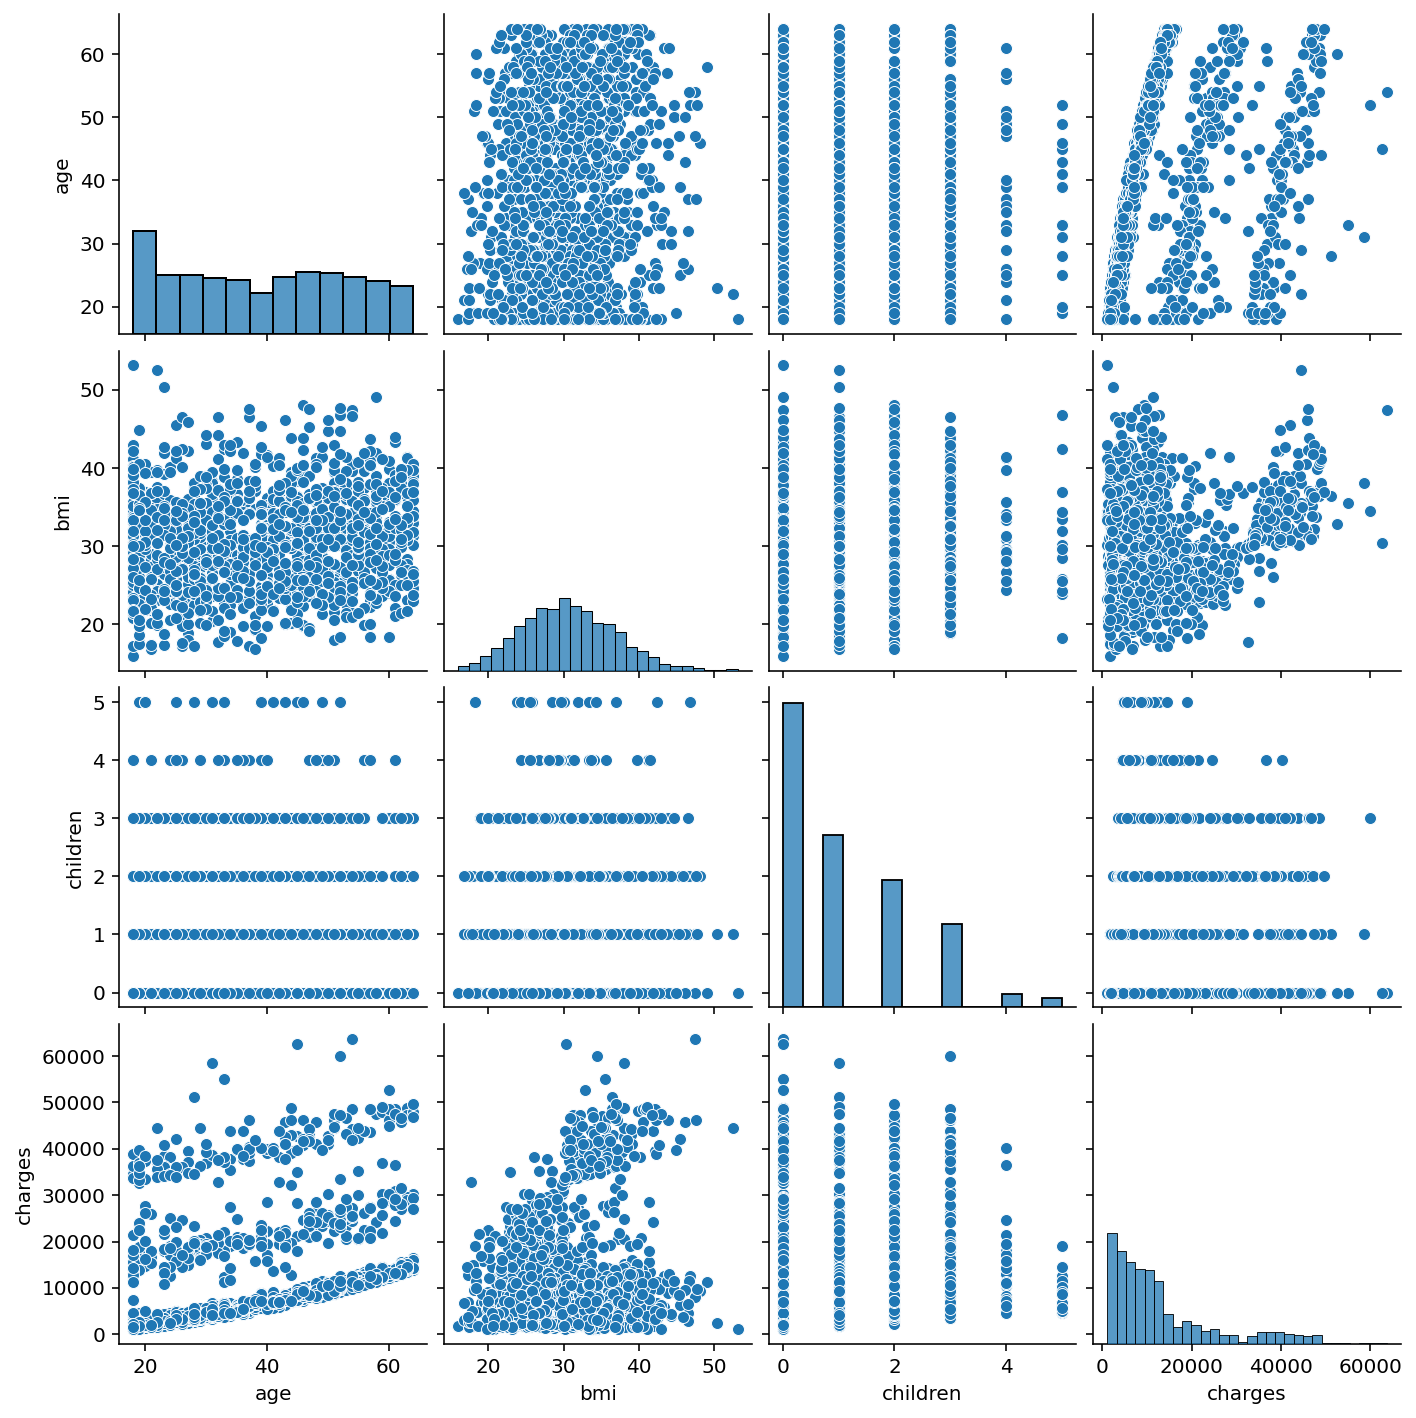

In [473]:
# 상관분석
sns.pairplot(data)

- 다른 변수들에 비해 age 변수의 상관관계가 가장 강하다.
- 고령의 노인일 수록 의료비가 많이 청구되는 것을 알 수 있다.
- 상관관계 시각화 그래프에서 3줄의 그래프로 보여진 이유에 대해서 살펴 볼 필요가 있다.

**6) 범주값 변수 확인**

- 범주형 변수를 식별한 후 그 변수들이 어떤 범주값을 몇 개씩 갖는지 확인합니다.

In [474]:
# 범주값 개수 확인
print(data['sex'].value_counts())
print(data['smoker'].value_counts())
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


**7) 주요 변수 확인**

7-1) charges 변수 값 분포를 히스토그램으로 시각화해 확인합니다.

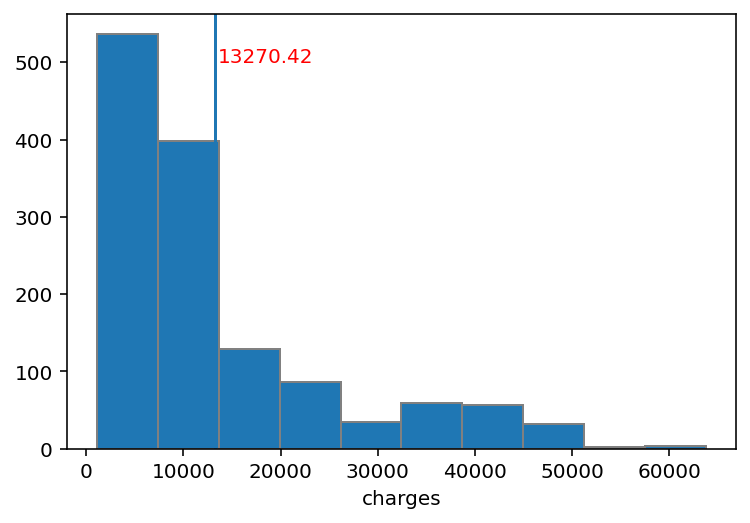

In [415]:
# charges 값 분포
plt.hist(data['charges'], bins=10, edgecolor='gray')
plt.axvline(data['charges'].mean())
plt.text(13500,500, round(data['charges'].mean(),2), color='r')
plt.xlabel('charges')
plt.show()


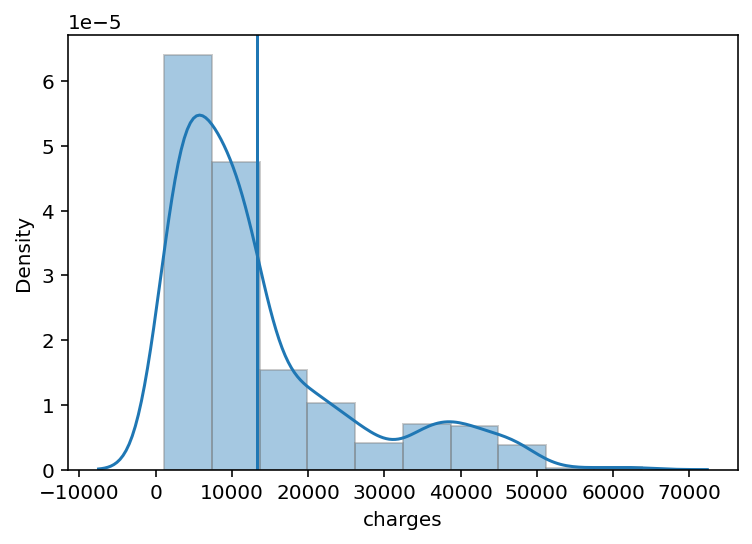

In [416]:
sns.distplot(data['charges'],bins=10,hist_kws=dict(edgecolor='gray'))
plt.axvline(data['charges'].mean())
plt.show()

- 의료비의 평균값은 13270.42 달러이다.
- 의료비가 평균값보다 적은 부분에 많은 사람들이 몰려있다.


7-2) age, charges 변수간 상관관계를 산점도(Scatter Plot)으로 시각화해 확인합니다.

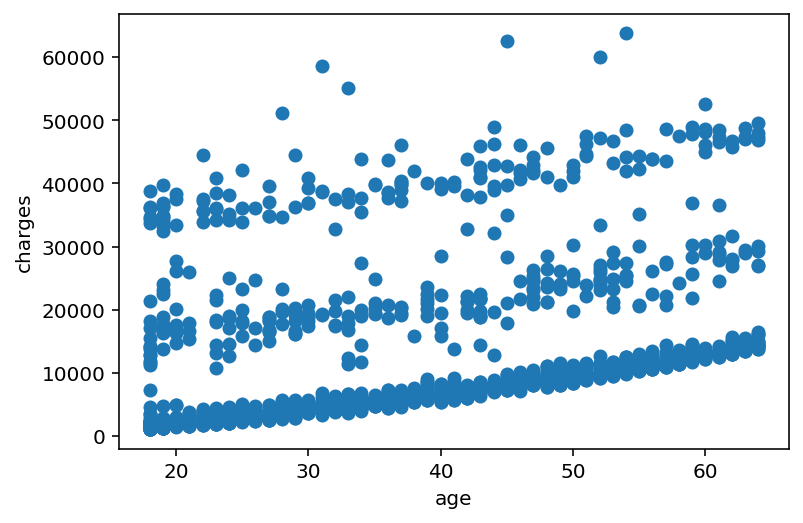

In [417]:
# age, charges 상관관계
plt.scatter('age', 'charges', data=data)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

- 크게 3줄로 나뉜 모양을 보아 0 ~ 10000달러 / 10000 ~ 20000달러 / 30000달러 이상 3개의 집단으로 나누어 분석할 필요가 있다.
- 세 집단 모두 나이가 들수록 의료비가 증가하는 것을 볼 수 있다.

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 가변수화**

- sex, smoker, region 변수들에 대한 가변수화를 진행 합니다.

In [418]:
# 가변수화
cols = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, columns=cols, drop_first=True)


# 확인
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


**2) 상관분석**

2-1) 변수가 추가되었으니 변수들 간의 상관관계를 다시 확인합니다.

In [419]:
# 상관분석
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


2-2) 변수들 간의 상관관계를 다시 시각화해 확인합니다.

Text(0, 0.5, 'sex_male')

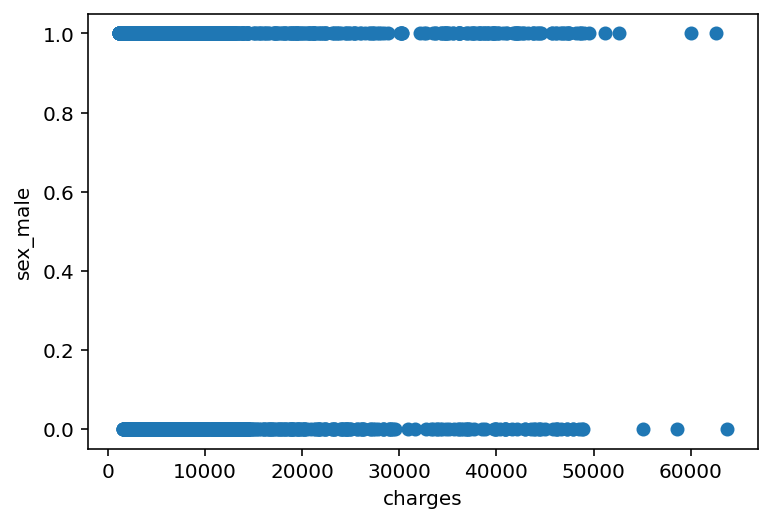

In [420]:
# 상관분석
plt.scatter(data['charges'], data['sex_male'])
plt.xlabel('charges')
plt.ylabel('sex_male')


Text(0, 0.5, 'smoker_yes')

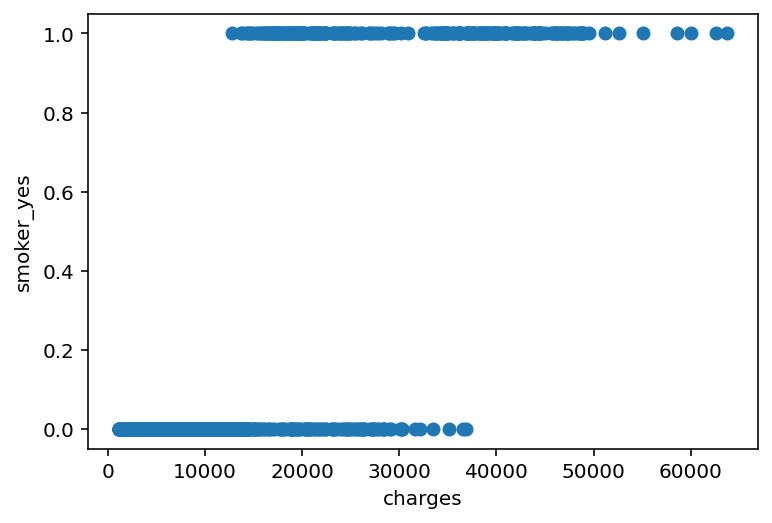

In [421]:
# 상관분석
plt.scatter(data['charges'], data['smoker_yes'])
plt.xlabel('charges')
plt.ylabel('smoker_yes')

- 성별에 따른 의료비는 큰 차이가 없는 것으로 볼 수 있다.
- 흡연자들의 의료비가 비흡연자들에 비해 높게 형성되어 있다.

**3) x, y 분리**

- charges 변수가 Target입니다.

In [422]:
# target 확인
target = 'charges'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [423]:
# 확인
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 7:3으로 분리합니다.
- random_state 옵션 값은 2022를 지정합니다.

In [424]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 각각의 성능을 확인합니다.
- 성능 평가는 mean_absolute_error, r2_score를 사용합니다.
- 각 알고리즘별로 요구되는 내용이 있으면 이를 숙지하면서 모델링을 진행합니다.

## 4.1.Linear Regression

### 4.1.1.모델링

- Linear Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [425]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [426]:
# 2단계: 선언하기
model = LinearRegression()

In [427]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [428]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [429]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 4023.060412326256
R2-Score : 0.7815638027456551


### 4.1.2.회귀 계수 확인

- 모델의 coef_, intercept_ 속성으로 변수들의 회귀 계수를 확인합니다.

In [430]:
# 회귀 계수 확인
print(list(x))
print(model.coef_)
print(model.intercept_)

# charges = -10334.7 + (243.6*age) + (306.5*bmi) + (472.7*children)
# + (-221.3*sex_male) + (23707.4*smoker_yes) + (-121.8*region_northwest)
# + (1088.93802262 *region_southeast) + (877.25427208*region_southwest)

['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
[  243.60038821   306.46006963   472.73303281  -221.31454859
 23707.39225536  -121.77571388 -1088.93802262  -877.25427208]
-10334.708051219171


- 모델의 회귀 계수(coef_)를 가로막대 그래프로 시각화해 확인합니다.

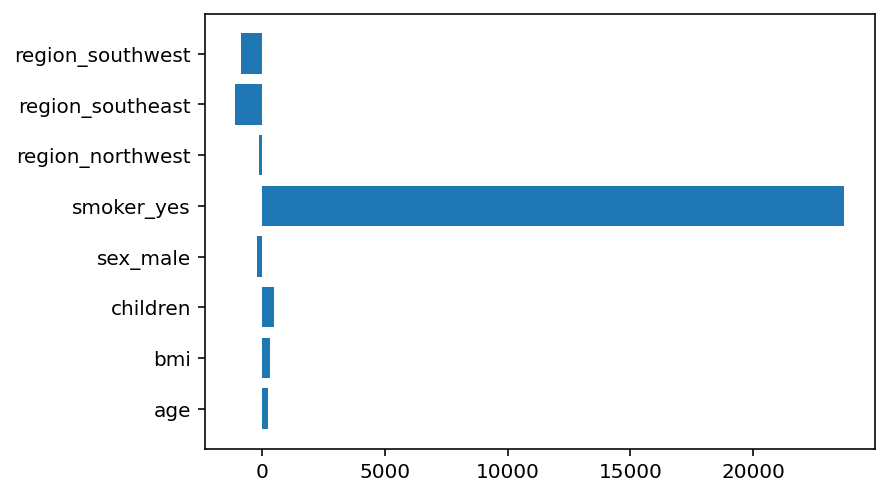

In [431]:
# 변수별 회귀계수 시각화
# 어떤 요소가 가장 중요도가 큰지 볼 수 있음
plt.barh(list(x), model.coef_)
plt.show()

- 흡연 유무가 가장 중요도가 큰 것임을 알 수 있다.


### 4.1.3.성능 정보 수집

- 모델 각각의 성능을 모아 마지막에 비교하기 위해 아래 구문을 수행해 성능 정보를 score 변수에 저장합니다.

In [432]:
# 성능 정보 수집
score={}
score['Linear Regression'] = r2_score(y_test, y_pred)

## 4.2.Decision Tree

### 4.2.1.모델링

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [433]:
# 1단계: 불러오기
from sklearn.tree import DecisionTreeRegressor

In [434]:
# 2단계: 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [435]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [436]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [437]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2881.683901691543
R2-Score : 0.7442120624775168


### 4.2.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [438]:
# 중요도 확인
print(model.feature_importances_)

[0.13245768 0.20970548 0.01944122 0.0051565  0.61850291 0.00548565
 0.00755326 0.00169731]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

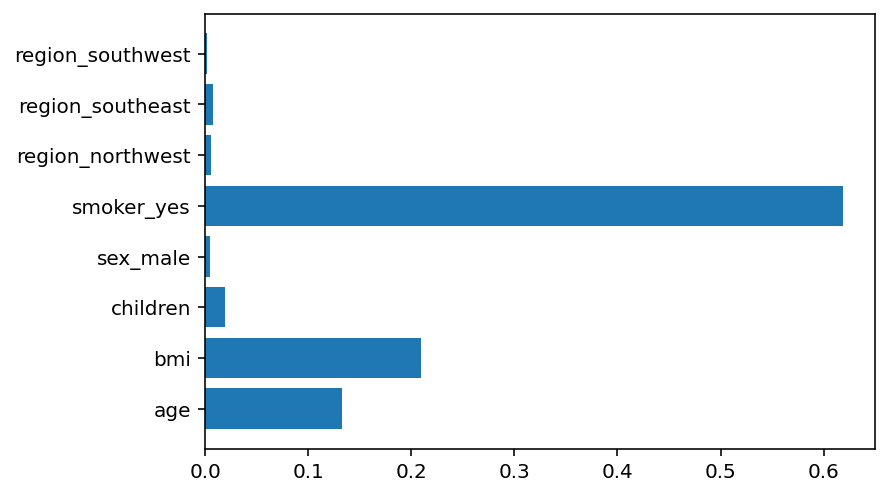

In [439]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- 흡연 유무, bmi, 나이 변수 순으로 중요도가 크다는 것을 알 수 있다.
- 사는 지역과 성별, 자녀 유무는 중요도가 크지 않은 것을 알 수 있다.

### 4.2.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [440]:
# 성능 정보 수집
score['Decision Tree'] = r2_score(y_test, y_pred)

## 4.3.Random Forest

### 4.3.1.모델링

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022을 지정합니다.

In [441]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestRegressor

In [442]:
# 2단계: 선언하기
model = RandomForestRegressor(random_state=2022)

In [443]:
# 3단계: 학습하기
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

In [444]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [445]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2546.9596018735906
R2-Score : 0.8626561004669977


### 4.3.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [446]:
# 중요도 확인
print(model.feature_importances_)

[0.13058358 0.20652291 0.02258343 0.00627828 0.61625573 0.00663591
 0.00637816 0.004762  ]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

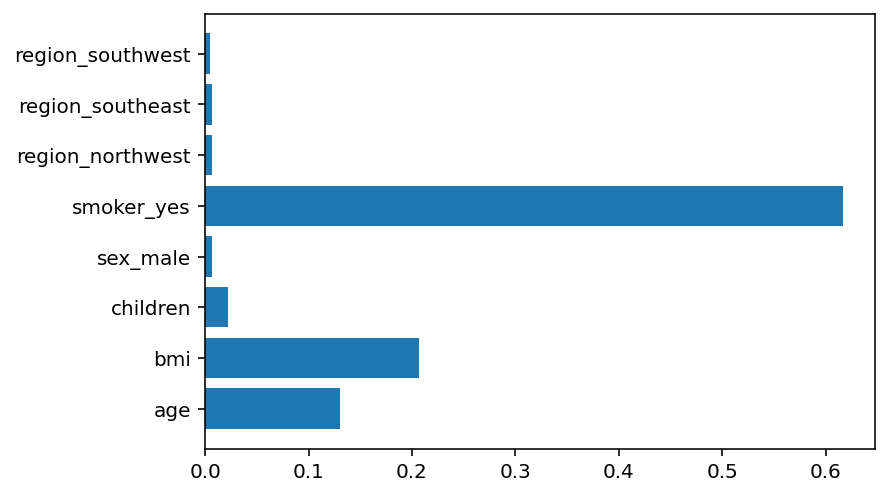

In [447]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- 흡연 유무, bmi, 나이 변수 순으로 중요도가 크다는 것을 알 수 있다.
- 사는 지역과 성별, 자녀 유무는 중요도가 크지 않은 것을 알 수 있다.


### 4.3.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [448]:
# 성능 정보 수집
score['Random Forest'] = r2_score(y_test, y_pred)

## 4.4.XGBoost

### 4.4.1.모델링

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 random_state=2022를 지정합니다.

In [449]:
# 1단계: 불러오기
from xgboost import XGBRegressor

In [450]:
# 2단계: 선언하기
model = XGBRegressor(random_state=2022)

In [451]:
# 3단계: 학습하기
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [452]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [453]:
# 5단계: 평가하기
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2983.640758507754
R2-Score : 0.8325147792080578


### 4.4.2.변수 중요도 확인

- 모델의 feature_importances_ 속성으로 변수들(Features) 중요도를 확인합니다.

In [454]:
# 중요도 확인
print(model.feature_importances_)

[0.01565696 0.01860508 0.00777858 0.0041144  0.9380717  0.00592639
 0.00505249 0.00479442]


- 변수 중요도를 가로막대 그래프로 시각화해 확인합니다.

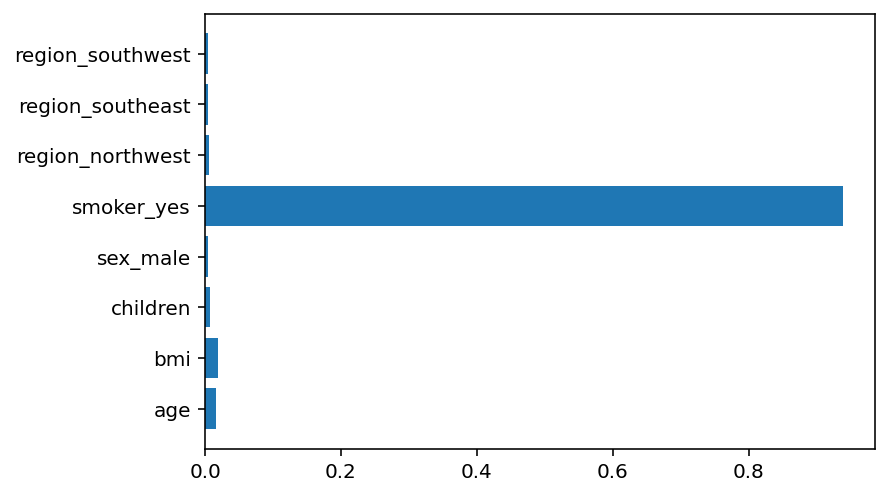

In [455]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()


- (의견) 다른 모델에 비해 흡연 유무에 대한 중요도가 증가하였다.
- (의견) 다른 모델에 비해 bmi와 나이에 대한 중요도가 감소하였다.

### 4.4.3.성능 정보 수집

- 아래 구문을 수행해 성능 정보를 수집합니다.

In [456]:
# 성능 정보 수집
score['XGBoost'] = r2_score(y_test, y_pred)

# 5.정리

- 앞에서 수집한 성능 정보를 시각화해 확인합니다.

-Linear Regression: 0.7816
-Decision Tree: 0.7442
-Random Forest: 0.8627
-XGBoost: 0.8325


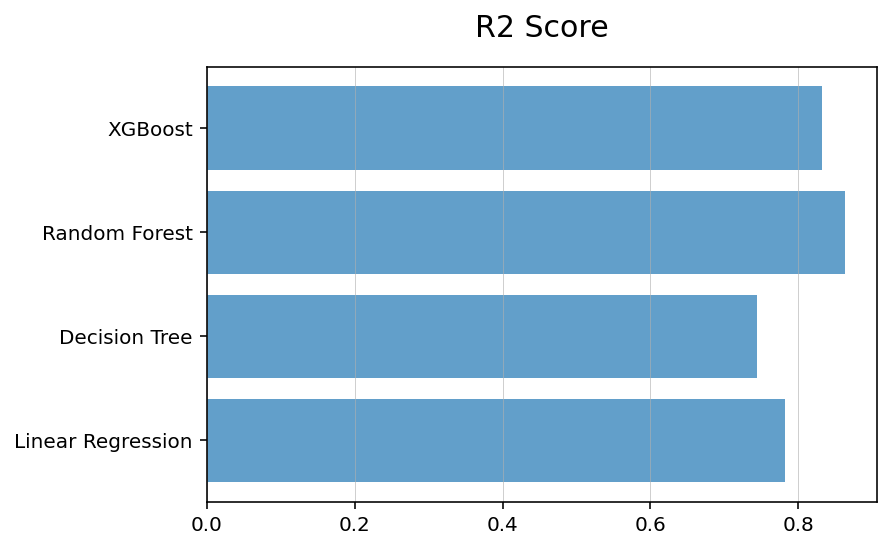

In [457]:
# 성능 정보
for k, v in score.items():
    print(f'-{k}: {v:.4f}')

# 시각화
plt.barh(list(score.keys()), score.values(), alpha=0.7)
plt.title('R2 Score', size=15, pad=15)
plt.grid(axis='x', linewidth=0.3)
plt.show()

- Random Forest의 정확도가 가장 높게, Decision Tree의 정확도가 가장 낮게 표현되었다.
- 앙상블 모델인 XGBoost, Random Forest가 확실히 정확도가 높게 표현되었다.
- random forest는 결정트리의 과적합을 줄이는 특성을 가지기 때문에 결정트리보다 성능이 좋게 나왔다고 볼 수 있다
- 선형회귀 모형은 흡연여부 외에는 크게 종속변수와 관계있는 변수가 없었기에 비교적 낮게 나왔다고 추측할 수 있다

# 6.(옵션) 튜닝

- 마음에 드는 모델을 선택하여 튜닝을 진행합니다.

In [458]:
# DecisionTreeRegressor 모델
# 불러오기
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 파라미터 선언
rand_param = {'max_depth' : range(1, 51)}

# 선언하기
model_dst = RandomForestRegressor(random_state=2022)

model = RandomizedSearchCV(model_dst,   # 기본 모델
                          rand_param,   # 파라미터 변수
                          cv=10,        # cv 값(K-Fold Cross Validation의 분할 수)
                          n_iter=10,    # 반복 횟수
                          scoring='r2',
                          n_jobs=-1) # 성능 기준
# 학습하기
model.fit(x_train, y_train)


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=2022),
                   n_jobs=-1, param_distributions={'max_depth': range(1, 51)},
                   scoring='r2')

{'max_depth': 11} 0.8265482540277255


<BarContainer object of 8 artists>

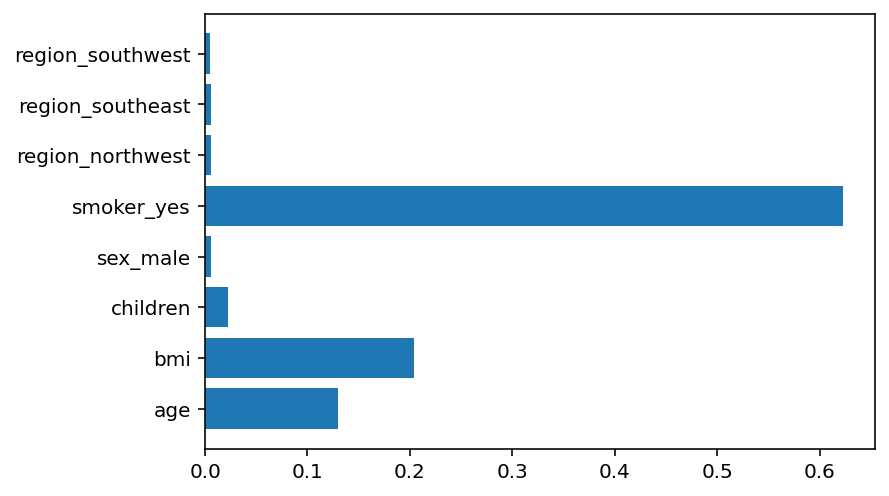

In [459]:
print(model.best_params_, model.best_score_)
plt.barh(list(x), model.best_estimator_.feature_importances_)

In [460]:
y_pred = model.predict(x_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2526.729591210088
R2-Score : 0.8651103698625638


- 최적의 max_depth 값은 5로 측정되었다.
- 튜닝으로 인해 R2-Score 값이 약간 상승하였다.

In [461]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param = {'max_depth' : range(1, 51)}

model_rfc=XGBRegressor(random_state=2022)
model = GridSearchCV(model_rfc,
                     param,
                     scoring='r2',
                     n_jobs=-1)

model.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                          

{'max_depth': 2} 0.8376574607653369


<BarContainer object of 8 artists>

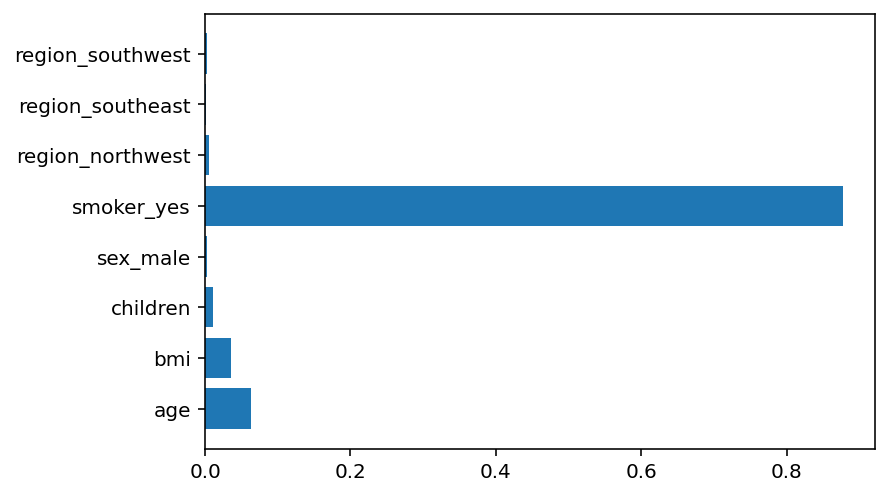

In [462]:
print(model.best_params_, model.best_score_)
plt.barh(list(x), model.best_estimator_.feature_importances_)

In [463]:
y_pred = model.predict(x_test)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2-Score :', r2_score(y_test, y_pred))

MAE : 2507.7966729119053
R2-Score : 0.8686077633393974


# 비즈니스 인사이트

> • 흡연의 여부에 따라 의료비가 크게 달라지는 점과 의료비에 영향을 미치는 변수들 중 나이와 bmi가 있다는 것을 볼 때 흡연자들의 나이대별 중증도와 흡연자들의 bmi별 중증도를 고려해 변수로 적용한다면 의료비 예측 성능 향상에 도움될 것이다.


> • 국민건강보험공단이 주최하는 흡연자 캠프, 건강관리시스템을 구축하여 흡연율과 bmI지수를 낮춰 의료비 절약이 될 수 있도록 프로그램을 개설하면 도움이 될 것이다.